<a href="https://colab.research.google.com/github/venkat2ram/AI_Playground/blob/main/Tabular_Playground_Series_Aug_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [90]:
dataset=pd.read_csv(r'C:\AI Practice\Tabular Playground Series - Aug 2021\train.csv')

In [91]:
dataset

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.27270,16.68570,30.35990,1.267300,0.392007,1.09101,1.96874,1.874640,117.286,6.716200,0.985656,0.973428,4004232,0.377896,1.033820,0.574531,0.122371,8.18617,1517.830,3.13219,0.112836,5.01868,116.766,10891,8.193660,5.79715,1.09999,14.86840,-0.275434,0.915721,167.800,-7.534140,4.23632,1.629560,1.144400,-0.303139,4.092090,3.22617,0.074799,0.259497,289.49200,327.4650,5.389310,7.39479,-0.489950,20.2923,2.45660,1.447720,-10639.000,85.6005,-0.178513,2815,-234.77200,1.83317,88.5605,0.367916,8.575340e+09,70.9733,0.380057,0.031812,1.09527,0.563482,0.122689,1.160720,1.69391,1.072170,65.15430,0.022504,-5.60680,1.798660,0.528068,6696.3000,-0.562078,1.301020,6.71624,1.143470,2.29983,0.010485,-0.127223,0.231086,4.51614,0.594494,397,0.264022,8.68790,15.070100,0.376622,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.296580,10.489800,15
1,1,0.784462,145,-0.463845,-0.530421,27324.90000,3.47545,160.49800,0.828007,3.735860,1.28138,-2.73947,-0.529506,157.670,0.696384,1.441230,0.159056,23567462,-0.089583,-0.711628,-1.045860,0.139920,3.69294,-123.354,7.74097,-0.852302,8.51025,161.175,87801,12.020200,1.78393,1.23100,10.14970,-0.018724,1.011280,127.401,11.821400,5.99681,-0.953850,1.379370,1.079530,0.711923,2.90602,0.051206,0.755122,140.89300,29.5252,14.229600,3.53213,-0.405681,42.5357,1.43533,0.939771,138312.000,59.8810,-0.070959,1435,1046.88000,1.56770,29.4306,2.455150,4.518200e+09,75.5602,1.987990,0.318177,1.14901,0.723574,0.184821,-0.348303,-7.17633,1.462580,43.11210,-0.060801,64.04550,2.358450,5.759690,3958.1400,1.576610,-1.241790,5.91412,0.959826,2.56631,0.000652,-0.335617,-0.271723,5.10319,8.706220,98,0.210513,7.86416,3.371900,0.147973,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.364700,1.143830,3
2,2,0.317816,19,-0.432571,-0.382644,1383.26000,19.71290,31.10260,-0.515354,34.430800,1.24210,2.90180,-0.960340,118.590,7.696420,1.488760,0.387277,235760,0.055568,0.268560,0.718133,0.027133,11.67340,270.247,3.44051,-0.679071,13.37810,150.362,14173,1.699540,7.04728,1.10513,7.62871,0.685721,0.809485,120.064,194.427000,6.77866,0.634136,0.934386,0.926980,0.741116,2.42205,0.260362,0.626639,369.57900,370.0240,4.488930,7.84290,1.196010,43.5343,2.59182,1.256710,168881.000,83.8419,2.713230,2911,23256.90000,3.91896,97.5578,4.385380,8.444970e+08,99.4933,5.098040,0.258909,1.16878,0.049053,0.173547,0.937000,2.05947,1.222450,50.22670,-0.026215,71.68490,2.434170,1.904560,27165.8000,-0.773223,-1.833390,4.98548,1.170870,1.17201,0.016848,-0.235581,-0.724935,3.22565,4.170990,105,-0.155451,8.91829,0.186334,0.335985,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.696790,12.305500,6
3,3,0.210753,17,-0.616454,0.946362,-119.25300,4.08235,185.25700,1.383310,-47.521400,1.09130,-1.51200,-1.292340,125.461,7.343230,-3.092390,0.713795,1146032,0.326534,0.454842,0.219958,0.037982,5.15195,4893.860,6.89751,-0.830552,4.43184,132.855,77147,32.809000,4.06390,1.11911,3.91776,0.500353,0.206448,120.411,233.537000,7.75131,0.625762,-1.940810,1.333210,-5.793170,1.56512,0.309483,0.134558,84.86370,24.3353,4.871200,2.55104,-0.372300,14.8960,1.10013,0.892193,17006.600,78.4078,0.425686,1723,375.24000,1.94539,98.1500,-0.109164,3.543970e+09,60.8082,2.357590,0.239080,1.16116,0.535797,0.222185,1.163120,2.36343,1.415300,116.18200,0.018674,55.44280,2.228240,4.303600,2643.7600,-1.666320,0.792398,6.45162,1.077330,2.90676,0.023735,-0.091992,-0.098701,4.27820,5.347530,512,0.855981,8.27663,4.066650,0.336490,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.456450,10.028800,2
4,4,0.439671,20,0.968126,-0.092546,74.30

In [92]:
#Check for the null values
max(dataset.isna().sum())
#There are no Nan values 

0

In [93]:
#Check the distinct datatypes in dataset
set(dataset.dtypes)
#As there are no string/object values, we need not check for categorical features.

{dtype('int64'), dtype('float64')}

In [94]:
#Check for descrete features.
descrete_features=[feature for feature in dataset.columns if len(set(dataset['f1']))<150]
descrete_features
#There are no descrete features. That means we can skip year check also.

[]

Let's plot a heatmap to identify the columns taht are affecting the output.

<AxesSubplot:>

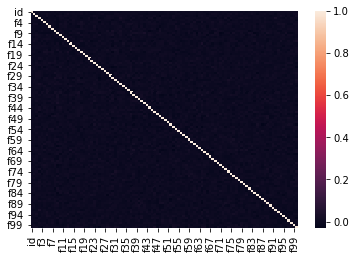

In [95]:
corr=dataset.corr()
sns.heatmap(corr)
#Looks like there is not much correlation between dependent and independent variables. Let's 

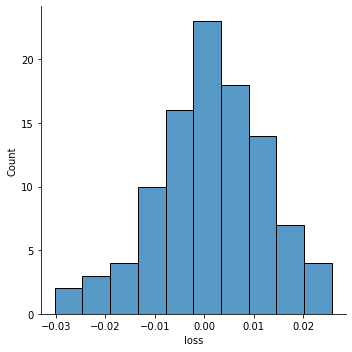

In [96]:
#Plot the distribution chart of correlation of loss variable with otehr variables.
sns.displot(corr["loss"][corr["loss"]!=1])
#It shows a very less correlation. Lets take features which have relation >0.01 and <-0.01

In [97]:
dataset=dataset[corr["loss"][ (corr["loss"]>0.01 )|(corr["loss"]<-0.01) ].index]

In [98]:
dataset.head()

,f1,f3,f13,f18,f21,f23,f25,f28,f31,f32,f41,f43,f46,f47,f48,f52,f53,f54,f58,f63,f64,f65,f66,f69,f70,f73,f74,f76,f77,f78,f79,f81,f84,f88,f96,loss
0,59,-1.350460,6.716200,1.033820,8.18617,3.13219,5.01868,8.19366,14.86840,-0.275434,3.22617,0.259497,5.389310,7.39479,-0.489950,-10639.0,85.6005,-0.178513,88.5605,0.031812,1.09527,0.563482,0.122689,1.07217,65.1543,1.798660,0.528068,-0.562078,1.301020,6.71624,1.143470,0.010485,4.51614,8.68790,1.828470,15
1,145,-0.530421,0.696384,-0.711628,3.69294,7.74097,8.51025,12.02020,10.14970,-0.018724,2.90602,0.755122,14.229600,3.53213,-0.405681,138312.0,59.8810,-0.070959,29.4306,0.318177,1.14901,0.723574,0.184821,1.46258,43.1121,2.358450,5.759690,1.576610,-1.241790,5.91412,0.959826,0.000652,5.10319,7.86416,0.819184,3
2,19,-0.382644,7.696420,0.268560,11.67340,3.44051,13.37810,1.69954,7.62871,0.685721,2.42205,0.626639,4.488930,7.84290,1.196010,168881.0,83.8419,2.713230,97.5578,0.258909,1.16878,0.049053,0.173547,1.22245,50.2267,2.434170,1.904560,-0.773223,-1.833390,4.98548,1.170870,0.016848,3.22565,8.91829,2.216760,6
3,17,0.946362,7.343230,0.454842,5.15195,6.89751,4.43184,32.80900,3.91776,0.500353,1.56512,0.134558,4.871200,2.55104,-0.372300,17006.6,78.4078,0.425686,98.1500,0.239080,1.16116,0.535797,0.222185,1.41530,116.1820,2.228240,4.303600,-1.666320,0.792398,6.45162,1.077330,0.023735,4.27820,8.27663,2.627310,2
4,20,-0.092546,17.394300,0.422461,8.14191,1.56561,7.56458,-1.54254,7.04632,-1.056850,2.48867,0.374760,0.763062,8.20657,-0.646135,-40791.9,70.7998,0.169193,84.0649,0.248451,1.18082,0.546460,0.140713,-2.50995,68.2459,0.461938,1.072440,0.691108,5.014080,6.06393,1.120250,-0.001272,1.11420,5.43062,2.195740,1
